In [3]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

# Building the first independent model

In [17]:
model = pybamm.BaseModel("height model")

# define parameters
w = pybamm.Parameter("Coating width [m]")
u_w = pybamm.Parameter("Web speed [ms-1]")
v = pybamm.Parameter("Volume flow [m3s-1]")
P= pybamm.Parameter("Pressure [Pa]")

# define variable
u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")


# governing equations
model.variables["Coating thickness [m]"] = v / w / u_w
model.variables["Velocity  [ms-1]"] = u
model.algebraic[u] = pybamm.div(pybamm.grad(u))-P

model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

# define geometry
r = pybamm.SpatialVariable(
    "r", domain=["coating"], coord_sys="cartesian"
)

geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

# mesh and discretise
submesh_types = {"coating": pybamm.Uniform1DSubMesh}
var_pts = {r: 20}


spatial_methods = {"coating": pybamm.FiniteVolume()}

#Add parameters
param = pybamm.ParameterValues(
    {
        "Coating width [m]": 1,
        "Web speed [ms-1]": "[input]",
        "Volume flow [m3s-1]": 1,
        "Pressure [Pa]": 1,
    }
)
values = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
thickness = []


# initial conditions
model.initial_conditions = {u: pybamm.Scalar(1)}


sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
sol = sim.solve([0, 1], inputs={"Web speed [ms-1]":1})

sim.plot(["Velocity  [ms-1]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

# Having multiple pressures on one plot for the model and normalising the values

Text(0.5, -0.15, 'Figure 1: Results of analytical modelling for (a) a velocity profile below the slot die region with different pressure heads using the Newtonian model')

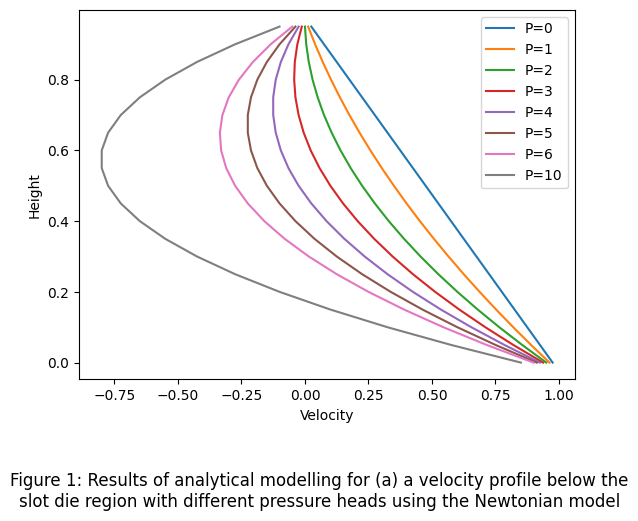

In [99]:
model = pybamm.BaseModel("height model")

# define parameters
P = pybamm.Parameter("Pressure [Pa]")

# define variable
u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")

# governing equations
model.variables["Velocity  [ms-1]"] = u
model.algebraic[u] = pybamm.div(pybamm.grad(u))-P

# boundary conditions
model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

# define geometry
r = pybamm.SpatialVariable(
    "r", domain=["coating"], coord_sys="cartesian"
)
geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

# mesh and discretise
submesh_types = {"coating": pybamm.Uniform1DSubMesh}
var_pts = {r: 20}


spatial_methods = {"coating": pybamm.FiniteVolume()}

#Add parameters
param = pybamm.ParameterValues(
    {
        "Pressure [Pa]": "[input]",
    }
)

values = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
normalised_values = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
pressure = [0,1,2,3,4,5,6,10]

# initial conditions
model.initial_conditions = {u: pybamm.Scalar(1)}

Coating_velocity = []

#Plots the solution to the model over a range of shear strain values for the given m value
for j in pressure:
    for i in values:
        sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
        sol = sim.solve([0, 1], inputs={"Pressure [Pa]":j})
        Coating_velocity.append(sol["Velocity  [ms-1]"].entries[i][0])

    plt.plot(Coating_velocity, normalised_values, label = "P={}".format(j))
    Coating_velocity = []

#Figure labels
plt.legend()
plt.ylabel(r"Height")
plt.xlabel(r"Velocity")

#Figure caption
txt="Figure 1: Results of analytical modelling for a velocity profile below the slot die region with different pressure heads using the Newtonian model"
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)


# Trying to get Pybamm.Integral to work

AttributeError: 'Integral' object has no attribute 'default_solver'

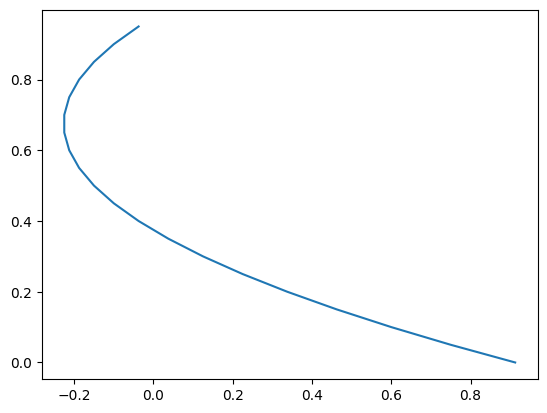

In [276]:
model = pybamm.BaseModel("height model")

# define parameters
P = pybamm.Parameter("Pressure [Pa]")

# define variable
u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")

# governing equations
model.variables["Velocity  [ms-1]"] = u
model.algebraic[u] = pybamm.div(pybamm.grad(u))-P

# boundary conditions
model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

# define geometry
r = pybamm.SpatialVariable(
    "r", domain=["coating"], coord_sys="cartesian"
)
geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}


model.variable["new variable"] = pybamm.Integral(u, r)


# mesh and discretise
submesh_types = {"coating": pybamm.Uniform1DSubMesh}
var_pts = {r: 20}


spatial_methods = {"coating": pybamm.FiniteVolume()}

#Add parameters
param = pybamm.ParameterValues(
    {
        "Pressure [Pa]": "[input]",
    }
)

values = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
normalised_values = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
pressure = [5]

# initial conditions
model.initial_conditions = {u: pybamm.Scalar(1)}

Coating_velocity = []

#Plots the solution to the model over a range of shear strain values for the given m value
for j in pressure:
    for i in values:
        sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
        sol = sim.solve([0, 1], inputs={"Pressure [Pa]":j})
        Coating_velocity.append(sol["Velocity  [ms-1]"].entries[i][0])

    plt.plot(Coating_velocity, normalised_values, label = "P={}".format(j))
    Coating_velocity = []

I=pybamm.Integral(u, r)

sim_1 = pybamm.Simulation(I, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
sol = sim_1.solve([0, 1], inputs={"Pressure [Pa]":j})

print(I)


#Figure labels
plt.legend()
plt.ylabel(r"Height")
plt.xlabel(r"Velocity")

#Figure caption
txt="Figure 1: Results of analytical modelling for a velocity profile below the slot die region with different pressure heads using the Newtonian model"
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)


Text(0.5, -0.15, 'Figure 1: Results of analytical modelling for (a) a velocity profile below the slot die region with different pressure heads using the Newtonian model')

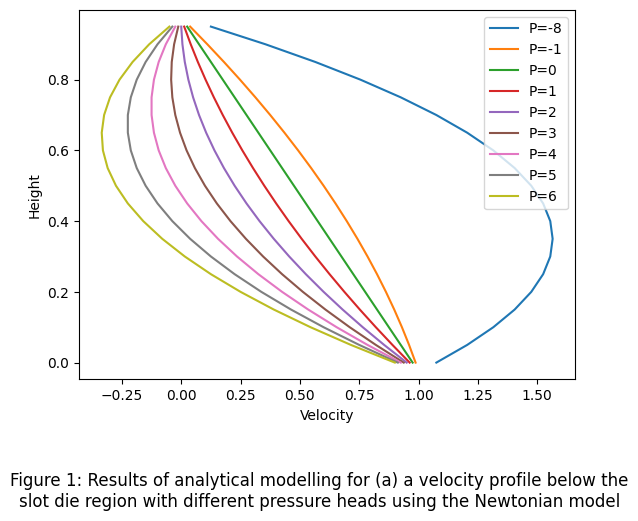

In [111]:
model = pybamm.BaseModel("height model")

# define parameters
P = pybamm.Parameter("Pressure [Pa]")
tau_y = pybamm.Parameter("Yield stress [Pa]")

# define variable
u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")

# governing equations
model.variables["Velocity  [ms-1]"] = u
model.algebraic[u] = pybamm.div(pybamm.grad(u)-tau_y)-P

# boundary conditions
model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

# define geometry
r = pybamm.SpatialVariable(
    "r", domain=["coating"], coord_sys="cartesian"
)
geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

# mesh and discretise
submesh_types = {"coating": pybamm.Uniform1DSubMesh}
var_pts = {r: 20}


spatial_methods = {"coating": pybamm.FiniteVolume()}

#Add parameters
param = pybamm.ParameterValues(
    {
        "Pressure [Pa]": "[input]",
        "Yield stress [Pa]": 3,
    }
)

values = np.arange(0,20)
normalised_values = values/20
pressure = [-8,-1,0,1,2,3,4,5,6]

# initial conditions
model.initial_conditions = {u: pybamm.Scalar(1)}

Coating_velocity = []

#Plots the solution to the model over a range of shear strain values for the given m value
for j in pressure:
    for i in values:
        sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
        sol = sim.solve([0, 1], inputs={"Pressure [Pa]":j})
        Coating_velocity.append(sol["Velocity  [ms-1]"].entries[i][0])

    plt.plot(Coating_velocity, normalised_values, label = "P={}".format(j))
    Coating_velocity = []

#Figure labels
plt.legend()
plt.ylabel(r"Height")
plt.xlabel(r"Velocity")

#Figure caption
txt="Figure 1: Results of analytical modelling for (a) a velocity profile below the slot die region with different pressure heads using the Newtonian model"
plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)


# Putting the model into a callable function

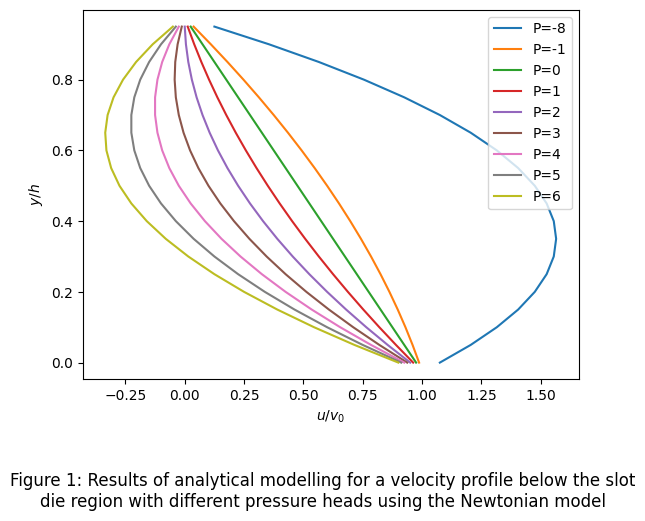

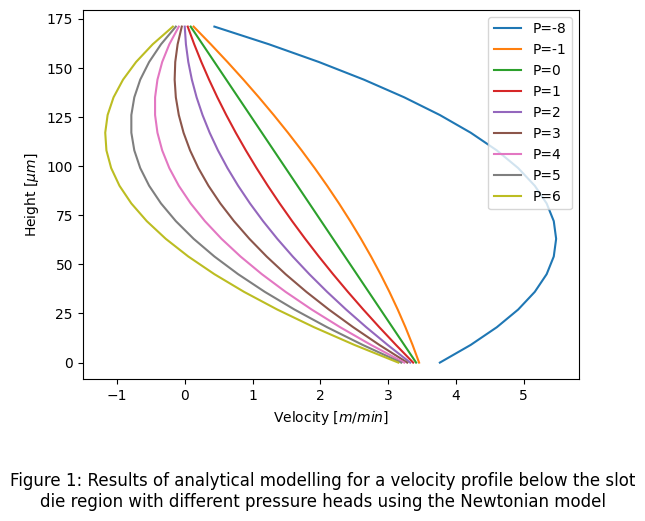

<Figure size 640x480 with 0 Axes>

In [158]:
def velocity_profile(U=1, H_g=1, m_0=1, viscosity="Newtonian", normalised=True, tau_y_input=3, Papanastasiou=False):
    model = pybamm.BaseModel("height model")

    # define parameters
    P = pybamm.Parameter("Pressure [Pa]")
    tau_y = pybamm.Parameter("Yield stress [Pa]")
    m = pybamm.Parameter("Exponent parameter [t]")

    # define variable
    u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")
    grad = pybamm.grad(u)

    # governing equations
    model.variables["Velocity  [ms-1]"] = u
    if Papanastasiou == False:
        if viscosity == "Newtonian":
            model.algebraic[u] = pybamm.div(grad)-P
        elif viscosity == "Herschel-Bulkley" or viscosity == "HB":
            model.algebraic[u] = pybamm.div(grad-tau_y)-P
    elif Papanastasiou == True:
        if viscosity == "Newtonian":
            model.algebraic[u] = pybamm.div(grad*(1-np.exp(-m*grad)))-P
        elif viscosity == "Herschel-Bulkley" or viscosity == "HB":
            model.algebraic[u] = pybamm.div(grad*(1-np.exp(-m*grad))-tau_y)-P

    # boundary conditions
    model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

    # define geometry
    r = pybamm.SpatialVariable(
        "r", domain=["coating"], coord_sys="cartesian"
    )
    geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

    # mesh and discretise
    submesh_types = {"coating": pybamm.Uniform1DSubMesh}
    var_pts = {r: 20}


    spatial_methods = {"coating": pybamm.FiniteVolume()}

    #Add parameters
    param = pybamm.ParameterValues(
        {
            "Pressure [Pa]": "[input]",
            "Yield stress [Pa]": tau_y_input,
            "Exponent parameter [t]": m_0,
        }
    )

    heights = np.arange(0,20)
    normalised_heights = heights/20
    pressure = [-8,-1,0,1,2,3,4,5,6]

    # initial conditions
    model.initial_conditions = {u: pybamm.Scalar(1)}

    Coating_velocity = []

    #Plots the solution to the model over a range of pressures
    for j in pressure:
        for i in heights:
            sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
            sol = sim.solve([0, 1], inputs={"Pressure [Pa]":j})
            Coating_velocity.append(sol["Velocity  [ms-1]"].entries[i][0])

        #Graph plotting
        if normalised == True:
            plt.plot(Coating_velocity, normalised_values, label = "P={}".format(j))
        elif normalised == False:
            plt.plot(np.array(Coating_velocity)*U, np.array(normalised_heights)*H_g, label = "P={}".format(j))

        Coating_velocity = []

    #Figure labels
    if normalised == 1:
        plt.legend()
        plt.ylabel(r"$y/h$")
        plt.xlabel(r"$u/v_0$")
    elif normalised == 0:
        plt.legend()
        plt.ylabel(r"Height [$\mu m$]")
        plt.xlabel(r"Velocity [$m/min$]")


    #Figure caption
    txt="Figure 1: Results of analytical modelling for a velocity profile below the slot die region with different pressure heads using the" + " {} ".format(viscosity) + "model"
    plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)

    #Reset the figure
    plt.figure()

velocity_profile(20,30)
velocity_profile(3.5,180, normalised=0)
#velocity_profile(20,30, normalised=0, Papanastasiou=1)


# Creating a class for the liquid and giving the class callable functions for multiple models

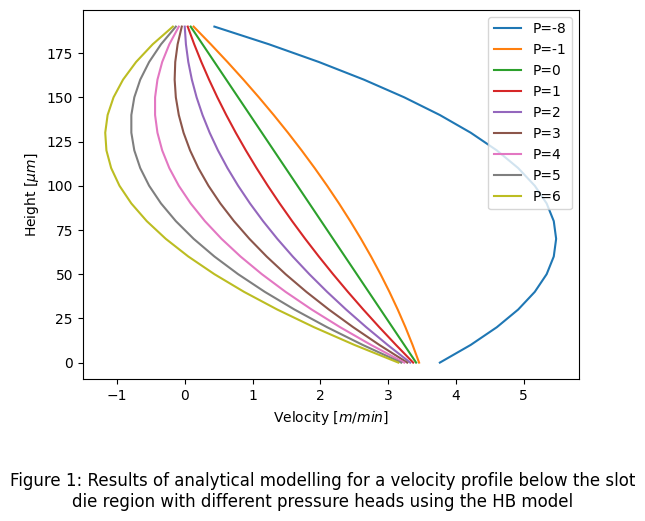

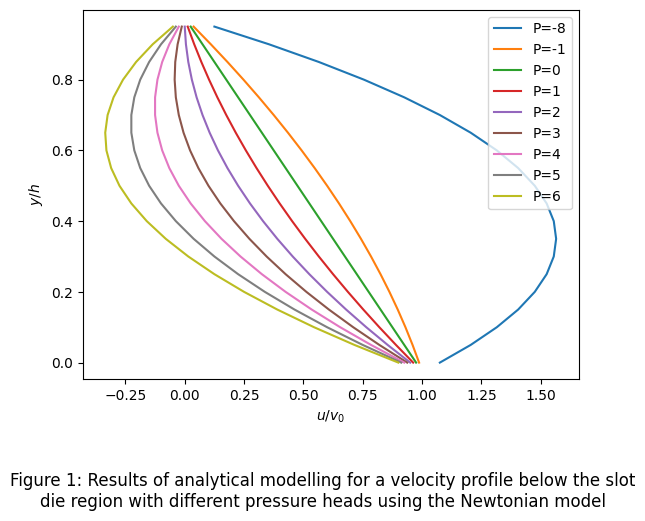

<Figure size 640x480 with 0 Axes>

In [190]:
#Creates a class which has input of the rheological infomation of the liquid for the slot die model. 
class slot_die_model():
    def __init__(self, U_input=1, H_g_input=1, tau_y_input=1, m_input=1, q_input=1, K_input=1, sigma_input=1, n_input=1, viscosity="Newtonian") -> None:
        self.U_input = U_input
        self.H_g_input = H_g_input
        self.tau_y_input = tau_y_input
        self.m_input = m_input
        self.viscosity = viscosity
        self.q_input=q_input
        self.K_input= K_input
        self.sigma_input = sigma_input
        self.n_input = n_input
        

    def velocity_profile(self, normalised=True, Papanastasiou=False):
        model = pybamm.BaseModel("height model")

        # define parameters
        P = pybamm.Parameter("Pressure [Pa]")
        tau_y = pybamm.Parameter("Yield stress [Pa]")
        m = pybamm.Parameter("Exponent parameter [t]")

        # define variable
        u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")
        grad = pybamm.grad(u)

        # governing equations
        model.variables["Velocity  [ms-1]"] = u
        if Papanastasiou == False:
            if self.viscosity == "Newtonian":
                model.algebraic[u] = pybamm.div(grad)-P
            elif self.viscosity == "Herschel-Bulkley" or self.viscosity == "HB":
                model.algebraic[u] = pybamm.div(grad-tau_y)-P
        elif Papanastasiou == True:
            if self.viscosity == "Newtonian":
                model.algebraic[u] = pybamm.div(grad*(1-np.exp(-m*grad)))-P
            elif self.viscosity == "Herschel-Bulkley" or self.viscosity == "HB":
                model.algebraic[u] = pybamm.div(grad*(1-np.exp(-m*grad))-tau_y)-P

        # boundary conditions
        model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

        # define geometry
        r = pybamm.SpatialVariable(
            "r", domain=["coating"], coord_sys="cartesian"
        )
        geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

        # mesh and discretise
        submesh_types = {"coating": pybamm.Uniform1DSubMesh}
        var_pts = {r: 20}


        spatial_methods = {"coating": pybamm.FiniteVolume()}

        #Add parameters
        param = pybamm.ParameterValues(
            {
                "Pressure [Pa]": "[input]",
                "Yield stress [Pa]": self.tau_y_input,
                "Exponent parameter [t]": self.m_input,
            }
        )

        heights = np.arange(0,20)
        normalised_heights = heights/20
        pressure = [-8,-1,0,1,2,3,4,5,6]

        # initial conditions
        model.initial_conditions = {u: pybamm.Scalar(1)}

        Coating_velocity = []

        #Plots the solution to the model over a range of pressures
        for j in pressure:
            for i in heights:
                sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
                sol = sim.solve([0, 1], inputs={"Pressure [Pa]":j})
                Coating_velocity.append(sol["Velocity  [ms-1]"].entries[i][0])

            #Graph plotting
            if normalised == True:
                plt.plot(Coating_velocity, normalised_values, label = "P={}".format(j))
            elif normalised == False:
                plt.plot(np.array(Coating_velocity)*self.U_input, np.array(normalised_heights)*self.H_g_input, label = "P={}".format(j))

            Coating_velocity = []

        #Figure labels
        if normalised == 1:
            plt.legend()
            plt.ylabel(r"$y/h$")
            plt.xlabel(r"$u/v_0$")
        elif normalised == 0:
            plt.legend()
            plt.ylabel(r"Height [$\mu m$]")
            plt.xlabel(r"Velocity [$m/min$]")


        #Figure caption
        txt="Figure 1: Results of analytical modelling for a velocity profile below the slot die region with different pressure heads using the" + " {} ".format(self.viscosity) + "model"
        plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)

        #Reset the figure
        plt.figure()





model_1 = slot_die_model(U_input=3.5,H_g_input=200, viscosity="HB")
model_1.velocity_profile(normalised = 0)


model_2 = slot_die_model(U_input=3.5,H_g_input=180)
model_2.velocity_profile(normalised = 1)



# Adding coating_window function

In [13]:
#Creates a class which has input of the rheological infomation of the liquid for the slot die model. 
class slot_die_model():
    def __init__(self, U_input=1, H_g_input=1, tau_y_input=1, m_input=100, q_input=1, K_input=1, sigma_input=1, n_input=1, viscosity="Newtonian") -> None:
        self.U_input = U_input #Coating speed
        self.H_g_input = H_g_input #Coating gap
        self.tau_y_input = tau_y_input #Yield stress
        self.m_input = m_input
        self.viscosity = viscosity
        self.q_input=q_input #flow rate
        self.K_input= K_input #Consistency index
        self.sigma_input = sigma_input #surface tension
        self.n_input = n_input #Power-law index
    #    self.mesh_num = mesh_num #Number of mesh points in model
        

    def velocity_profile(self, normalised=True, Papanastasiou=False, mesh_num=20, Pressure_list=[-8,-2,0,2,4,6], plot=True):
        model = pybamm.BaseModel("height model")

        # define parameters
        P = pybamm.Parameter("Pressure [Pa]")
        tau_y = pybamm.Parameter("Yield stress [Pa]")
        m = pybamm.Parameter("Exponent parameter [t]")

        # define variable
        u = pybamm.Variable("Velocity [ms-1]", domain = "coating")
        grad = pybamm.grad(u)

        # governing equations
        model.variables["Velocity  [ms-1]"] = u
        if Papanastasiou == False:
            if self.viscosity == "Herschel-Bulkley" or self.viscosity == "HB":
                model.algebraic[u] = pybamm.div(grad)-P
        elif Papanastasiou == True:
            if self.viscosity == "Herschel-Bulkley" or self.viscosity == "HB":
                model.algebraic[u] = pybamm.div(grad*(1-np.exp(-m*grad)))-P

        # boundary conditions
        model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

        # define geometry
        r = pybamm.SpatialVariable(
            "r", domain=["coating"], coord_sys="cartesian"
        )
        geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

        # mesh and discretise
        submesh_types = {"coating": pybamm.Uniform1DSubMesh}
        var_pts = {r: mesh_num}


        spatial_methods = {"coating": pybamm.FiniteVolume()}

        #Add parameters
        param = pybamm.ParameterValues(
            {
                "Pressure [Pa]": "[input]",
                "Yield stress [Pa]": self.tau_y_input,
                "Exponent parameter [t]": self.m_input,
            }
        )

        heights = np.arange(0,mesh_num)
        normalised_heights = heights/mesh_num
        pressure = Pressure_list

        # initial conditions
        model.initial_conditions = {u: pybamm.Scalar(1)}

        Coating_velocity = []
        Coating_velocity_h = []

        #Plots the solution to the model over a range of pressures
        for j in pressure:
            for i in heights:
                sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
                sol = sim.solve([0, 1], inputs={"Pressure [Pa]":j})
                Coating_velocity.append(sol["Velocity [ms-1]"].entries[i][0])
                Coating_velocity_h = Coating_velocity

            #Graph plotting for either normalised and non-normalised solutions
            if plot == 1:    
                if normalised == True:
                    plt.plot(Coating_velocity, normalised_heights, label = "P={}".format(j))
                elif normalised == False:
                    plt.plot(np.array(Coating_velocity)*self.U_input, np.array(normalised_heights)*self.H_g_input, label = "P={}".format(j))


            Coating_velocity = []
        if plot == 1:
            #Figure labels
            if normalised == 1:
                plt.legend()
                plt.ylabel(r"$y/h$")
                plt.xlabel(r"$u/v_0$")
            elif normalised == 0:
                plt.legend()
                plt.ylabel(r"Height [$\mu m$]")
                plt.xlabel(r"Velocity [$m/min$]")


        #Figure caption
        txt="Figure 1: Results of analytical modelling for a velocity profile below the slot die region with different pressure heads using the" + " {} ".format(self.viscosity) + "model"
        plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)

        #Reset the figure
        plt.figure()

        return Coating_velocity_h
 

    def coating_window(self):

        #Define model
        model = pybamm.BaseModel("Coating window")
        
        # define parameters
        H_g = pybamm.Parameter("Coating Gap [m]")
        U = pybamm.Parameter("Coating speed [m/min]")
        K = pybamm.Parameter("Consistency index [Pa s^n]")
        q = pybamm.Parameter("Flow rate []")
        n = pybamm.Parameter("Power law index")
        sigma = pybamm.Parameter("Surface tension [Nm-1]")
        tau_y = pybamm.Parameter("Yield stress [Pa]")
        R_gt = pybamm.Parameter("Gap-to-thickness ratio")


        # governing equations
        model.variables["Pressure change [Pa]"] = K*R_gt**((2*n+1)*1/3)*((K*(U*1/H_g)**(n-1))*1/sigma)**(-1/3)+(tau_y*1/(K*(U*1/H_g)**n))*R_gt

        #Add parameters from class input
        param = pybamm.ParameterValues(
            {
                "Coating Gap [m]": self.H_g_input,
                "Coating speed [m/min]": self.U_input,
                "Consistency index [Pa s^n]": self.K_input,
                "Flow rate []": self.q_input,
                "Power law index": self.n_input,
                "Surface tension [Nm-1]": self.sigma_input,
                "Yield stress [Pa]": self.tau_y_input,
                "Gap-to-thickness ratio": "[input]"
            }
        )

        #Give a set of R_gt values to solve for
        R_gt_vals = np.arange(0,20)
        normalised_R_gt_vals = R_gt_vals/20
        Pressure_change = []

        #Plots the solution to the model over the range of R_gt values
        for i in R_gt_vals:
            sim = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
            sol = sim.solve([0, 1], inputs={"Gap-to-thickness ratio": R_gt_vals[i]})
            Pressure_change.append(sol["Pressure change [Pa]"].entries[0])

        #Graph plotting
        plt.plot(normalised_R_gt_vals, Pressure_change, label = "P={}".format(j))

        Pressure_change = []

        plt.legend()
        plt.ylabel(r"Vacuum pressure [Pa]")
        plt.xlabel(r"Gap-to-thickness ratio, $R_{gt}$")

        #Reset the figure
        plt.figure()
#        if 

    
#    def rheological_plot(self): 





model_1 = slot_die_model(U_input=3.5, H_g_input=200, viscosity="Newtonian")
#model_1.velocity_profile(normalised = 0)

model_2 = slot_die_model(U_input=3.5, H_g_input=200, tau_y_input=1, m_input=1, q_input=1, K_input=1, sigma_input=1, n_input=10, viscosity="HB")
model_1.velocity_profile(normalised = 1, mesh_num=10, Papanastasiou = True)


model_3 = slot_die_model(U_input=3.5,H_g_input=180)

model_1.coating_window()



ValueError: Variable with name 'Velocity [ms-1]' is in variables dictionary with name 'Velocity  [ms-1]'. Names must match.

# Added Coating_thickness function

The integral 

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]
[array([-0.025,  0.025,  0.075,  0.125,  0.175,  0.225,  0.275,  0.325,
        0.375,  0.425,  0.475,  0.525,  0.575,  0.625,  0.675,  0.725,
        0.775,  0.825,  0.875,  0.925,  0.975,  1.025]), array([-0.025,  0.025,  0.075,  0.125,  0.175,  0.225,  0.275,  0.325,
        0.375,  0.425,  0.475,  0.525,  0.575,  0.625,  0.675,  0.725,
        0.775,  0.825,  0.875,  0.925,  0.975,  1.025]), array([-0.025,  0.025,  0.075,  0.125,  0.175,  0.225,  0.275,  0.325,
        0.375,  0.425,  0.475,  0.525,  0.575,  0.625,  0.675,  0.725,
        0.775,  0.825,  0.875,  0.925,  0.975,  1.025]), array([-0.025,  0.025,  0.075,  0.125,  0.175,  0.225,  0.275,  0.325,
        0.375,  0.425,  0.475,  0.525,  0.575,  0.625,  0.675,  0.725,
        0.775,  0.825,  0.875,  0.925,  0.975,  1.025]), array([-0.025,  0.025,  0.075,  0.125,  0.175,  0.225,  0.275,  0.325,
        0.375,  0.425,  0.475

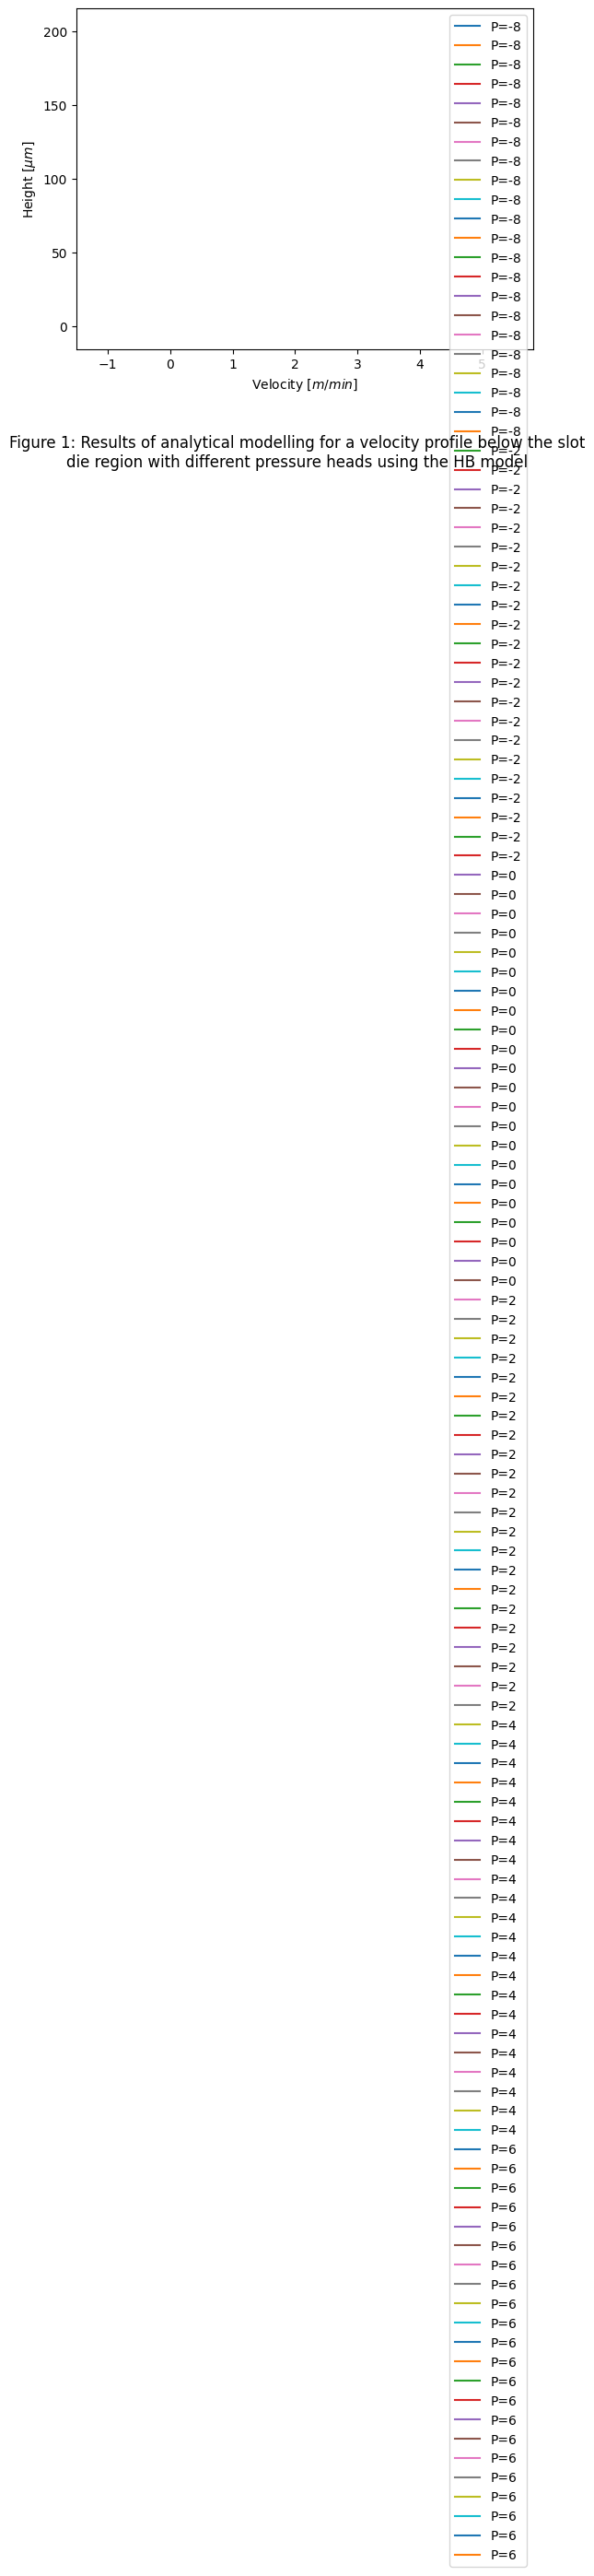

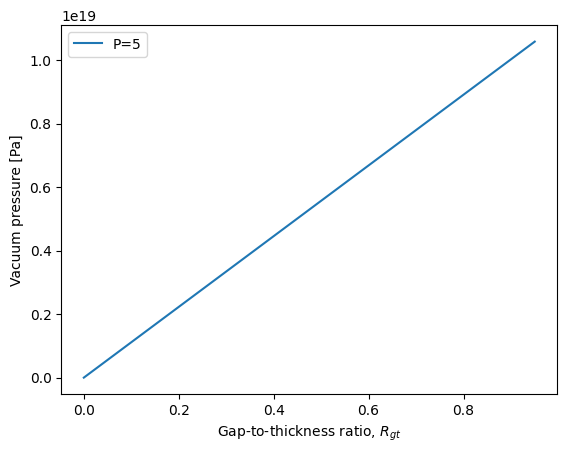

<Figure size 640x480 with 0 Axes>

In [300]:
#Creates a class which has input of the rheological infomation of the liquid for the slot die model. 
class slot_die_model():
    def __init__(self, U_input=1, H_g_input=1, tau_y_input=1, m_input=1, q_input=1, K_input=1, sigma_input=1, n_input=1, viscosity="HB") -> None:
        self.U_input = U_input #Coating speed
        self.H_g_input = H_g_input #Coating gap
        self.tau_y_input = tau_y_input #Yield stress
        self.m_input = m_input
        self.viscosity = viscosity
        self.q_input=q_input #flow rate
        self.K_input= K_input #Consistency index
        self.sigma_input = sigma_input #surface tension
        self.n_input = n_input #Power-law index
    #    self.mesh_num = mesh_num #Number of mesh points in model
        

    def velocity_profile(self, normalised=True, Papanastasiou=False, mesh_num=20, Pressure_list=[-8,-2,0,2,4,6], plot=True):
        model = pybamm.BaseModel("height model")

        # define parameters
        P = pybamm.Parameter("Pressure [Pa]")
        tau_y = pybamm.Parameter("Yield stress [Pa]")
        m = pybamm.Parameter("Exponent parameter [t]")

        # define variable
        u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")
        grad = pybamm.grad(u)

        # governing equations
        model.variables["Velocity  [ms-1]"] = u

        if Papanastasiou == False:
            if self.viscosity == "Herschel-Bulkley" or self.viscosity == "HB":
                model.algebraic[u] = pybamm.div(grad)-P
        elif Papanastasiou == True:
            if self.viscosity == "Herschel-Bulkley" or self.viscosity == "HB":
                model.algebraic[u] = pybamm.div(grad*(1-np.exp(-m*grad)))-P

        # boundary conditions
        model.boundary_conditions = {u: {"left": (1, "Dirichlet"), "right": (0, "Dirichlet")}}

        # define geometry
        r = pybamm.SpatialVariable(
            "r", domain=["coating"], coord_sys="cartesian"
        )
        model.variables["r"] = r
        geometry = {"coating": {r: {"min": pybamm.Scalar(0), "max": pybamm.Scalar(1)}}}

        # mesh and discretise
        submesh_types = {"coating": pybamm.Uniform1DSubMesh}
        var_pts = {r: mesh_num}


        spatial_methods = {"coating": pybamm.FiniteVolume()}

        #Add parameters
        param = pybamm.ParameterValues(
            {
                "Pressure [Pa]": "[input]",
                "Yield stress [Pa]": self.tau_y_input,
                "Exponent parameter [t]": self.m_input,
            }
        )

        

        heights = np.arange(0,mesh_num)
        normalised_heights = heights/mesh_num
        pressure = Pressure_list
        print(normalised_heights)

        # initial conditions
        model.initial_conditions = {u: pybamm.Scalar(1)}

        Coating_velocity = []
        Coating_velocity_h = []

        #Plots the solution to the model over a range of pressures
        normalised_heights = []
        for j in pressure:
            for i in heights:
                sim = pybamm.Simulation(model, parameter_values=param, geometry=geometry, submesh_types=submesh_types, spatial_methods=spatial_methods, var_pts=var_pts)
                sol = sim.solve([0, 1], inputs={"Pressure [Pa]":j})
                Coating_velocity.append(sol["Velocity  [ms-1]"](t=0))
                normalised_heights.append(sol["r"](t=0))
                Coating_velocity_h = Coating_velocity

            
            print(normalised_heights)
            #Graph plotting for either normalised and non-normalised solutions
            if plot == 1:    
                if normalised == True:
                    plt.plot(Coating_velocity, normalised_heights, label = "P={}".format(j))
                elif normalised == False:
                    plt.plot(np.array(Coating_velocity)*self.U_input, np.array(normalised_heights)*self.H_g_input, label = "P={}".format(j))


            Coating_velocity = []
            normalised_heights = []

        if plot == 1:
            #Figure labels
            if normalised == 1:
                plt.legend()
                plt.ylabel(r"$y/h$")
                plt.xlabel(r"$u/v_0$")
            elif normalised == 0:
                plt.legend()
                plt.ylabel(r"Height [$\mu m$]")
                plt.xlabel(r"Velocity [$m/min$]")
            
                #Figure caption
                txt="Figure 1: Results of analytical modelling for a velocity profile below the slot die region with different pressure heads using the" + " {} ".format(self.viscosity) + "model"
                plt.figtext(0.5, -0.15, txt, wrap=True, horizontalalignment='center', fontsize=12)

                #Reset the figure
                plt.figure()

        return Coating_velocity_h
 

    def coating_window(self):

        #Define model
        model = pybamm.BaseModel("Coating window")
        
        # define parameters
        H_g = pybamm.Parameter("Coating Gap [m]")
        U = pybamm.Parameter("Coating speed [m/min]")
        K = pybamm.Parameter("Consistency index [Pa s^n]")
        q = pybamm.Parameter("Flow rate []")
        n = pybamm.Parameter("Power law index")
        sigma = pybamm.Parameter("Surface tension [Nm-1]")
        tau_y = pybamm.Parameter("Yield stress [Pa]")
        R_gt = pybamm.Parameter("Gap-to-thickness ratio")


        # governing equations
        model.variables["Pressure change [Pa]"] = K*R_gt**((2*n+1)*1/3)*((K*(U*1/H_g)**(n-1))*1/sigma)**(-1/3)+(tau_y*1/(K*(U*1/H_g)**n))*R_gt

        #Add parameters from class input
        param = pybamm.ParameterValues(
            {
                "Coating Gap [m]": self.H_g_input,
                "Coating speed [m/min]": self.U_input,
                "Consistency index [Pa s^n]": self.K_input,
                "Flow rate []": self.q_input,
                "Power law index": self.n_input,
                "Surface tension [Nm-1]": self.sigma_input,
                "Yield stress [Pa]": self.tau_y_input,
                "Gap-to-thickness ratio": "[input]"
            }
        )

        #Give a set of R_gt values to solve for
        R_gt_vals = np.arange(0,20)
        normalised_R_gt_vals = R_gt_vals/20
        Pressure_change = []

        #Plots the solution to the model over the range of R_gt values
        for i in R_gt_vals:
            sim = pybamm.Simulation(model, parameter_values=param, solver=pybamm.DummySolver())
            sol = sim.solve([0, 1], inputs={"Gap-to-thickness ratio": R_gt_vals[i]})
            Pressure_change.append(sol["Pressure change [Pa]"].entries[0])

        #Graph plotting
        plt.plot(normalised_R_gt_vals, Pressure_change, label = "P={}".format(j))

        Pressure_change = []

        plt.legend()
        plt.ylabel(r"Vacuum pressure [Pa]")
        plt.xlabel(r"Gap-to-thickness ratio, $R_{gt}$")

        #Reset the figure
        plt.figure()

    def coating_thickness(self, Pressure=1):
        thickness_model = slot_die_model(
            U_input=self.U_input, 
            H_g_input=self.H_g_input, 
            tau_y_input=self.tau_y_input, 
            m_input=self.m_input, 
            q_input=self.q_input, 
            K_input=self.K_input, 
            sigma_input=self.sigma_input, 
            n_input=self.n_input, 
            viscosity=self.viscosity)
        
        analytical_thickness = self.q_input / self.U_input
        
        #Need to set up the integral over a range of mesh point amounts and then plot the thickness against mesh points amounts
        thickness_model.velocity_profile(normalised = 1, mesh_num=10, plot = 0)

#        if 

    
#    def rheological_plot(self): 


model_1 = slot_die_model(U_input=3.5, H_g_input=200, tau_y_input=3, m_input=1, q_input=1, K_input=2, sigma_input=1, n_input=10)
model_1.velocity_profile(normalised = 0, plot=1)


model_3 = slot_die_model(U_input=3.5,H_g_input=180)

model_1.coating_window()
model_1.coating_thickness()



In [294]:
sim.solution["Velocity  [ms-1]"](t=0.2,r=0.9)

array(-0.125)

In [288]:
sim.plot(["Velocity  [ms-1]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

# Ferran meeting

In [73]:
import pybamm

class Newtonian(pybamm.BaseModel):
    def __init__(self, name= "Newtionian model"):
        super().__init__(name=name) #This initiaties the inherited class

        ##################
        #Define parameter
        ##################
        P = pybamm.Parameter("Pressure [Pa]")
        U = pybamm.Parameter("Coating speed [ms-1]")

        #################
        #Define variables
        #################
        u = pybamm.Variable("Velocity  [ms-1]", domain = "coating")
        y = pybamm.SpatialVariable("y [m]", domain="coating", coord_sys="cartesian")

        ####################
        #Governing equations
        ####################
        grad = pybamm.grad(u)
        self.algebraic[u] = pybamm.div(grad)-P

        ####################
        #Boundary conditions
        ####################
        self.boundary_conditions = {u: {"left": (U, "Dirichlet"), "right": (0, "Dirichlet")}}
        self.initial_conditions = {u: U}

        ##################
        #Output variables
        ##################
        self.variables.update({
            "Velocity  [ms-1]": u,
            "Coating thickness [m]": pybamm.Integral(u, y)/U,
            "y [m]": y,
        })
    
    @property
    def default_geometry(self):
        H_g = pybamm.Parameter("Coating Gap [m]")
        y = self.variables["y [m]"]
        return {"coating": {y: {"min": pybamm.Scalar(0), "max": H_g}}}
    
    @property
    def default_var_pts(self):
        y = self.variables["y [m]"]
        return {y: 20}
    
    @property
    def default_submesh_types(self):
        return {"coating": pybamm.Uniform1DSubMesh}
    
    @property
    def default_spatial_methods(self):
        return {"coating": pybamm.FiniteVolume()}

#Add parameters
param = pybamm.ParameterValues(
    {
        "Pressure [Pa]": "[input]",
        "Yield stress [Pa]": 2,
        "Exponent parameter [t]": 3,
        "Coating Gap [m]": 1,
        "Coating speed [ms-1]": 5,
    }
)

model = Newtonian()
sim = pybamm.Simulation(model, parameter_values=param)
solutions = []

for P in range(-2,6):
    sol = sim.solve([0, 1], inputs={"Pressure [Pa]": P})
    solutions.append(sol)

In [75]:
model = Newtonian()
y = model.variables["y [m]"]
var_pts = {y: 1}

In [10]:
ç

(0.0, 1.0)

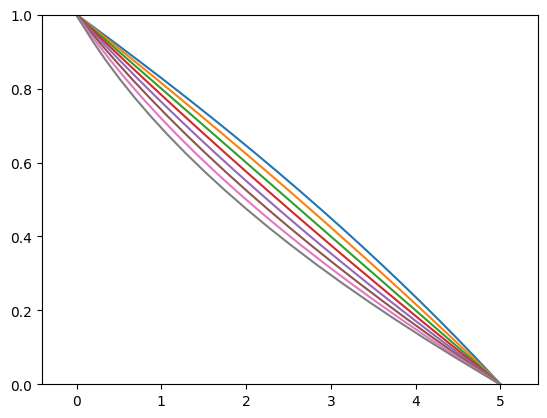

In [76]:
import matplotlib.pyplot as plt
for sol in solutions:
    y = sol["y [m]"](t=0)
    u = sol["Velocity  [ms-1]"](t=0)
    plt.plot(u, y)
plt.ylim([0, 1])

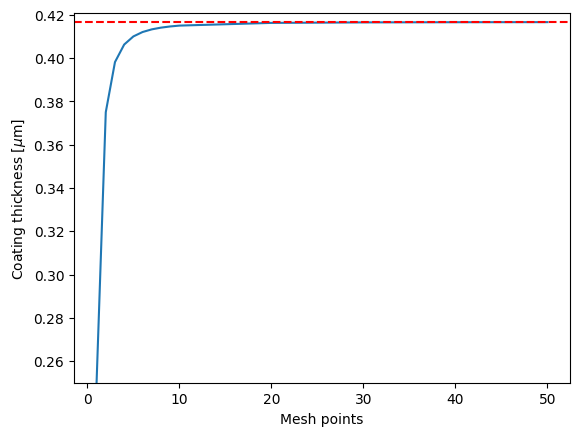

In [67]:
from sklearn.metrics import mean_squared_error
model = Newtonian()

#Add parameters
param = pybamm.ParameterValues(
    {
        "Pressure [Pa]": "[input]",
        "Yield stress [Pa]": 2,
        "Exponent parameter [t]": 3,
        "Coating Gap [m]": 1,
        "Coating speed [ms-1]": 5,
    }
)

var_pts_list = [1,2,3,4,5,6,7,8,9,10,20,30,40,50]
soulations = []
var_pts = {model.variables["y [m]"]: 20}
thickness_list = []

for pts in var_pts_list:
    sim = pybamm.Simulation(model, parameter_values=param, var_pts={model.variables["y [m]"]: pts})

    sol = sim.solve([0, 1], inputs={"Pressure [Pa]": 5})
    solutions.append(sol)

    thickness_list.append(sol["Coating thickness [m]"](t=0))

plt.plot(var_pts_list, thickness_list)
plt.axhline(y = thickness_list[-1], color = 'r', linestyle = '--') #thicknesses[-1] has been used as a temporary analytical solution    
plt.ylim(thickness_list[0], thickness_list[-1]*1.01)
plt.xlabel("Mesh points")
plt.ylabel(r"Coating thickness [$\mu$m]")
    
solutions = []

Text(0.5, 0, 'Mesh points')

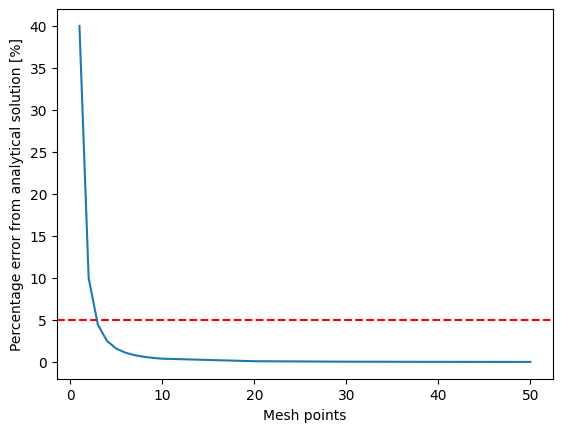

In [72]:
analytical_solution = (np.full((1, len(thickness_list)), thickness_list[-1]))[0]   

error_list = []

for thickness in thickness_list:
    error = (thickness_list[-1] - thickness)/thickness_list[-1] *100
    error_list.append(error)

plt.axhline(y = 5, color = 'r', linestyle = '--')
plt.plot(var_pts_list, error_list)
plt.ylabel("Percentage error from analytical solution [%]")
plt.xlabel("Mesh points")
